In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from itertools import combinations
from metrics import *
import time
from scipy.spatial import distance

In [9]:
def deltaS(Ci,Cj):
    minDist=np.inf
    print(Ci,Cj)
    for xi in Ci:
        for yj in Cj:
            xi=np.array(xi)
            yj=np.array(yj)
            distance=np.linalg.norm(xi-yj)            
            if distance< minDist:
                minDist=distance
                twoPoints=np.array([xi,yj])            
                    
    return minDist,twoPoints

D=pd.read_csv('iris.csv').values[:,[0,1,2,3]].tolist()



In [10]:
C1=list(range(9))
C1=[[i] for i in C1]
print(C1)
C1[0].append(12)
print(C1)

[[0], [1], [2], [3], [4], [5], [6], [7], [8]]
[[0, 12], [1], [2], [3], [4], [5], [6], [7], [8]]


In [11]:
a=np.array([1,2,2,2,3,4,5,6,6,7,8,9,1,7,7,3])
np.unique(a)
b=np.where(a<6)
b

(array([ 0,  1,  2,  3,  4,  5,  6, 12, 15], dtype=int64),)

[1 1 1 1 1 1 2 2 2 2 2 3 3 3 3]


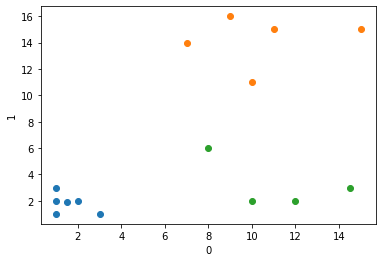

In [18]:
def deltaSingle(Ci,Cj):
    minDist=np.inf
    for xi in Ci:
        for yj in Cj:            
            xi=np.array(xi)
            yj=np.array(yj)
            
            distance=np.linalg.norm(xi-yj)            
            if distance <= minDist:
                minDist=distance                          
                    
    return minDist

def deltaComplete(Ci,Cj):
    minDist=0
    for xi in Ci:
        for yj in Cj:            
            xi=np.array(xi)
            yj=np.array(yj)
            
            distance=np.linalg.norm(xi-yj)            
            if distance >= minDist:
                minDist=distance
                           
                    
    return minDist

def agglomerativeClusteringNaive(D,dist,k=1):
    C1=np.arange(D.shape[0])    
    
    
    while True:
        
        uniqueC1=np.unique(C1)        
        minDis=np.inf        
        
        for combo in combinations(uniqueC1,2):            
            Ct1=np.array(D)[np.where(C1==combo[0])] 
            Ct2=np.array(D)[np.where(C1==combo[1])]
                           
            interClusterDis=dist(Ct1,Ct2)
            
            if interClusterDis<=minDis:
                
                minDis=interClusterDis
                clusterIndx=[combo[0],combo[1]]
                
        C1 = np.where(C1== clusterIndx[1], clusterIndx[0], C1)
        
        if uniqueC1.shape[0]==k+1:
            break;
            
    C1=np.unique(C1, return_inverse = True)[1]+1 
    return C1

D=np.array([[1,2],[1,1],[1,3],[2,2],[3,1],[1.5,1.9],[10,11],[9,16],[7,14],[11,15],[15,15],[10,2],[12,2],[14.5,3],[8,6]])
C1=agglomerativeClusteringNaive(D,deltaSingle,3)
plotClusters(D, C1, 0, 1, None, None)
print(C1)

[0 1 2 3 4 5]
1.4142135623730951
3.1622776601683795
8.634813257969162
10.15135458941318
[0 1 2 1 4 5]


,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,1.414214,NaN,NaN,NaN,NaN
2,5.000000,3.162278,NaN,NaN,NaN
3,13.753545,8.634813,8.930845,NaN,NaN
4,16.414932,10.151355,11.421471,3.7,NaN


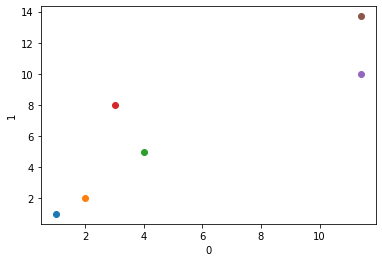

In [75]:
D=np.array([[1,1],[2,2],[4,5],[3,8],[11.4,10],[11.4,13.7]])

plotClusters(D, C1, 0, 1, None, None)
def distances(D,columns):
    dicDist=np.zeros([D.shape[0],D.shape[0]])
    dicDist[:] = np.nan
    for combo in combinations(np.arange(D.shape[0]),2):
        dicDist[combo[1],combo[0]]=np.linalg.norm(D[combo[0],columns]-D[combo[1],columns])  
    
    return dicDist

Delta=distances(D,[0,1])  

def dist(i,j,r,Delta):
    dist=np.array([Delta[r,[i,j]],Delta[[i,j],r]])    
    mindist=np.amin(dist,where=~np.isnan(dist), initial=np.inf)
    print(mindist)
    index=min(i,j)
    if(np.isnan(Delta[r,index])):
        Delta[index,r]=mindist
    else:
        Delta[r,index]=mindist    
    return Delta

i,j=1,3
N=np.arange(D.shape[0])
print(N)
for k in range(D.shape[0]):
    if not(k==i or k==j):
        Delta=dist(i,j,k,Delta)
N = np.where(N== j, i, N)
Delta=np.delete(Delta, j, 0)
Delta=np.delete(Delta, j, 1)
print(N)
df = pd.DataFrame(data=Delta)
df


In [97]:
a=np.arange(1,11)
print(a)
a[9]=a[7]
print(a)
a[[9,7]]=1
print(a)
print(np.unique(a) )
b=np.unique(a)[7]
a = np.where(a== b, 3, a)
print(a)
b=np.unique(a)[2]
print(b)
a = np.where(a== b, 1, a)
print(a)

[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5 6 7 8 9 8]
[1 2 3 4 5 6 7 1 9 1]
[1 2 3 4 5 6 7 9]
[1 2 3 4 5 6 7 1 3 1]
3
[1 2 1 4 5 6 7 1 1 1]


In [99]:
x=np.array([1,1,1,4,5,6,6,7,8,9,1,2,2,3])
y = np.bincount(x)
y

array([0, 4, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
tiempo:  94.12932419776917


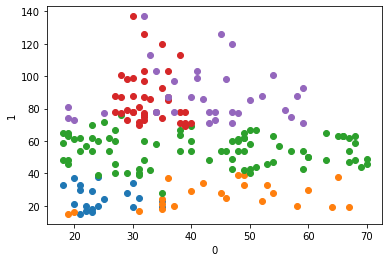

In [127]:

def deltaSingleNaive(Ci,Cj):
    minDist=np.inf
    for xi in Ci:
        for yj in Cj:
            distan=np.linalg.norm(xi-yj)           
            if distan <= minDist:
                minDist=distan                          
                    
    return minDist

def deltaCompleteNaive(Ci,Cj):
    minDist=0
    for xi in Ci:
        for yj in Cj:            
            distan=np.linalg.norm(xi-yj)
            if distan >= minDist:
                minDist=distan
                           
                    
    return minDist

def agglomerativeClusteringNaive(D,dist,k=1):
    cols,rows = D.shape[0],D.shape[1]     
    C = [[i] for i in range(cols)]
    clusterCount=len(C)
    t=0
    while clusterCount>k:
        t=t+1
        print(t)
        minDist = np.inf
        ci=-1      
        cj=-1
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                distancia = dist(D[C[i],:],D[C[j],:])
               
                if distancia < minDist:
                    minDist = distancia
                    ci,cj = i,j
                
        newCluster = (C[ci] + C[cj])
        del C[cj]
        del C[ci]
        C.append(newCluster)
        clusterCount = len(C)
    Cf = np.zeros(cols)
    for i,c in enumerate(C):
        for ind in c:
            Cf[ind] = i
    return Cf
D=pd.read_csv('Mall_Customers.csv').values[:,[2,3,4]]
#C2=agglomerativeClusteringNaive(D,deltaSingleNaive,5)
#plotClusters(D, C2, 0, 1, None, None)
start = time.time()
C1=agglomerativeClusteringNaive(D,deltaCompleteNaive,5)
end = time.time()
plotClusters(D, C1, 0, 1, None, None)
print("tiempo: ",end-start)

In [ ]:
def agglomerativeClusteringNaive(D, dist, k=1):
  
    n = D.shape[0]
    m = D.shape[1]
    C = [[i] for i in range(n)]
  
    numClusters = len(C)
    while numClusters > k:
    
        minDist = float('inf')
        clui = -1
        cluj = -1
    

        for i in range(numClusters):
            for j in range(i+1,numClusters):
                distancia = dist(D[C[i],:],D[C[j],:])
                if distancia < minDist:
                    minDist = distancia
                    clui = i
                    cluj = j
    
    newCluster = (C[clui] + C[cluj])
    
    # deleting second element (cluj) first to avoid displacement of first element
    del C[cluj]
    del C[clui]
    C.append(newCluster)
    numClusters = len(C)    
  
    C2 = np.zeros(n)
    for i,c in enumerate(C):
        for ind in c:
            C2[ind] = i
    return C2

def distance(p1,p2):
    diff = p2-p1
    diff2 = diff**2
    suma = np.sum(diff2)
    return suma 

def singleLink(C1,C2):
    minDist = float('inf')
    n1 = C1.shape[0]
    n2 = C2.shape[0]
    for i in range(n1):
        for j in range(n2):
            this_dist = distance(C1[i],C2[j])
            if this_dist < minDist: 
                minDist = this_dist
    return minDist

def completeLink(C1,C2):
    maxDist = 0
    n1 = C1.shape[0]
    n2 = C2.shape[0]
    for i in range(n1):
        for j in range(n2):
            this_dist = distance(C1[i],C2[j])
            if this_dist > maxDist: 
                maxDist = this_dist
    return maxDist

D=pd.read_csv('Mall_Customers.csv').values[:,[2,3,4]]
#C2=agglomerativeClusteringNaive(D,deltaSingleNaive,5)
#plotClusters(D, C2, 0, 1, None, None)
start = time.time()
C1=agglomerativeClusteringNaive(D,completeLink,5)
end = time.time()
plotClusters(D, C1, 0, 1, None, None)
print("tiempo: ",end-start)